# TAREA

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [24]:
def f(x):
    return((np.exp(x))*(np.log(x)))

N = 10
np.random.seed(0)
#u = np.random.rand(N)  # np.random.rand? Generar "N" valores aleatorios con distribución uniforme entre 0 y 1
u = np.random.uniform(1, 3, N) # Igual que arriba
np.mean(f(u))

N = np.logspace(1, 5, 5) #Genera 7 elementos desde 10^1 hasta 10^5
table1 = pd.DataFrame(columns=["Aproximación1", "Error1"], index=N)
table1

def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    return np.mean(f(u)*(b-a))

for i in N:
    table1.loc[i, "Aproximación1"] = montecarlo(f, int(i), 1, 3)
table1

table1["Error1"] = np.abs(14.0275 - table["Aproximación1"])
table1

,Aproximación1,Error1
10.0,17.124484,11.2275
100.0,13.112357,11.2275
1000.0,13.958147,8.4275
10000.0,13.845923,11.2275
100000.0,14.058764,11.2275


In [25]:
def f(x):
    return(np.sin(x)*(np.log(x)))

N = 10
np.random.seed(0)
#u = np.random.rand(N)  # np.random.rand? Generar "N" valores aleatorios con distribución uniforme entre 0 y 1
u = np.random.uniform(1, 3, N) # Igual que arriba
np.mean(f(u))

N = np.logspace(1, 5, 5) #Genera 7 elementos desde 10^1 hasta 10^5
table2 = pd.DataFrame(columns=["Aproximación2", "Error2"], index=N)
table2

def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    return np.mean(f(u)*(b-a))

for i in N:
    table2.loc[i, "Aproximación2"] = montecarlo(f, int(i), 1, 3)
table2

table2["Error2"] = np.abs(0.869844 - table["Aproximación2"])
table2

,Aproximación2,Error2
10.0,0.749296,3.610156
100.0,0.871405,6.690156
1000.0,0.853486,2.490156
10000.0,0.867307,2.770156
100000.0,0.868826,3.330156


In [26]:
table = pd.DataFrame(columns=["Aproximación1", "Error1", "Aproximación2", "Error2"], index=N)
table["Aproximación1"] = table1["Aproximación1"]
table["Error1"] = table1["Error1"]
table["Aproximación2"] = table2["Aproximación2"]
table["Error2"] = table2["Error2"]
table

,Aproximación1,Error1,Aproximación2,Error2
10.0,17.124484,11.2275,0.749296,3.610156
100.0,13.112357,11.2275,0.871405,6.690156
1000.0,13.958147,8.4275,0.853486,2.490156
10000.0,13.845923,11.2275,0.867307,2.770156
100000.0,14.058764,11.2275,0.868826,3.330156


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

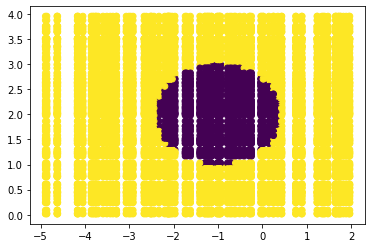

In [7]:
def circulo(x, y) : 
    return (x**2 + 2*y**2 <= -2*x+8*y-7)

x = np.random.uniform(-5, 2, 100)
y = np.random.uniform(0, 4, 100)
X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c=~circulo(X, Y))

In [11]:
def montecarlo21(region, ax, bx, ay, by, N) : 
    x = np.random.uniform (ax, bx, N)
    y = np.random.uniform(ay, by , N)
    B = region(x, y)
    AR = (bx - ax)*(by -ay)
    return np.mean(B)*AR

montecarlo21(circulo, -5, 2, 0, 4, 10)

2.8000000000000003

In [12]:
def error_relativo1(AD, AR) :
    return(np.sqrt((1-AD/AR)/(AD/AR)))
AD = montecarlo21(circulo, -5, 2, 0, 4, 10)
AR = 28
error_relativo1(AD, AR)

3.0

In [13]:
def montecarlo22(region, ax, bx, ay, by, N) : 
    x = np.random.uniform (ax, bx, N)
    y = np.random.uniform(ay, by , N)
    B = region(x, y)
    AR = (bx - ax)*(by -ay)
    return np.mean(B)*AR

montecarlo22(circulo, -5, 2, 0, 4, 100)

2.8000000000000003

In [14]:
def error_relativo2(AD, AR) :
    return(np.sqrt((1-AD/AR)/(AD/AR)))
AD = montecarlo22(circulo, -5, 2, 0, 4, 100)
AR = 28
error_relativo2(AD, AR)

2.2096047024697585

In [15]:
def montecarlo23(region, ax, bx, ay, by, N) : 
    x = np.random.uniform (ax, bx, N)
    y = np.random.uniform(ay, by , N)
    B = region(x, y)
    AR = (bx - ax)*(by -ay)
    return np.mean(B)*AR

montecarlo23(circulo, -5, 2, 0, 4, 1000)

4.5920000000000005

In [16]:
def error_relativo3(AD, AR) :
    return(np.sqrt((1-AD/AR)/(AD/AR)))
AD = montecarlo23(circulo, -5, 2, 0, 4, 1000)
AR = 28
error_relativo3(AD, AR)

2.3084873670979085

In [17]:
def montecarlo24(region, ax, bx, ay, by, N) : 
    x = np.random.uniform (ax, bx, N)
    y = np.random.uniform(ay, by , N)
    B = region(x, y)
    AR = (bx - ax)*(by -ay)
    return np.mean(B)*AR

montecarlo24(circulo, -5, 2, 0, 4, 10000)

4.3932

In [18]:
def error_relativo4(AD, AR) :
    return(np.sqrt((1-AD/AR)/(AD/AR)))
AD = montecarlo24(circulo, -5, 2, 0, 4, 10000)
AR = 28
error_relativo4(AD, AR)

2.339335783803837

In [19]:
def montecarlo25(region, ax, bx, ay, by, N) : 
    x = np.random.uniform (ax, bx, N)
    y = np.random.uniform(ay, by , N)
    B = region(x, y)
    AR = (bx - ax)*(by -ay)
    return np.mean(B)*AR

montecarlo25(circulo, -5, 2, 0, 4, 100000)

4.43408

In [20]:
def error_relativo5(AD, AR) :
    return(np.sqrt((1-AD/AR)/(AD/AR)))
AD = montecarlo25(circulo, -5, 2, 0, 4, 100000)
AR = 28
error_relativo5(AD, AR)

2.295816179929228

In [21]:
import pandas as pd

N = np.logspace(1, 5, 5) #Genera 7 elementos desde 10^1 hasta 10^5
table = pd.DataFrame(columns=["Aproximación1", "Error1", "Aproximación2", "Error2", "Aproximación3", "Error3", "Aproximación4", "Error4", "Aproximación5", "Error5"], index=N)
for i in N : 
    table.loc[i, "Aproximación1"] = montecarlo21(circulo, -5, 2, 0, 4, 10)
    table.loc[i, "Error1"] = error_relativo1(AD, AR)
    table.loc[i, "Aproximación2"] = montecarlo22(circulo, -5, 2, 0, 4, 100)
    table.loc[i, "Error2"] = error_relativo2(AD, AR)
    table.loc[i, "Aproximación3"] = montecarlo23(circulo, -5, 2, 0, 4, 1000)
    table.loc[i, "Error3"] = error_relativo3(AD, AR)
    table.loc[i, "Aproximación4"] = montecarlo24(circulo, -5, 2, 0, 4, 10000)
    table.loc[i, "Error4"] = error_relativo4(AD, AR)
    table.loc[i, "Aproximación5"] = montecarlo25(circulo, -5, 2, 0, 4, 100000)
    table.loc[i, "Error5"] = error_relativo5(AD, AR)
table

,Aproximación1,Error1,Aproximación2,Error2,Aproximación3,Error3,Aproximación4,Error4,Aproximación5,Error5
10.0,2.8,2.295816,4.48,2.295816,3.724,2.295816,4.3568,2.295816,4.41168,2.295816
100.0,2.8,2.295816,7.56,2.295816,4.256,2.295816,4.5696,2.295816,4.46936,2.295816
1000.0,5.6,2.295816,3.36,2.295816,4.536,2.295816,4.606,2.295816,4.40272,2.295816
10000.0,2.8,2.295816,3.64,2.295816,4.032,2.295816,4.5808,2.295816,4.40888,2.295816
100000.0,2.8,2.295816,4.2,2.295816,4.452,2.295816,4.4968,2.295816,4.46656,2.295816


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

**1. Determinar el riesgo de determinadas acciones en inversiones medias o altas:**

Para usar este Método primero se deben definir las estadísticas de tareas y de riesgos.
Las tareas poseen un valor de tipo medio, además de ser variables en función de unas estadísticas capaces de relacionar un coste a un porcentaje que mide la representatividad. Por su parte, el riesgo presenta dos probabilidades: la de ocurrencia y el impacto que puede tener.

Posteriormente calcular un valor concreto para cada riesgo y cada tarea. Lo cual se realiza a través de numeros aleatorios de entre 0 y 100.

Al asemejar cada número aleatorio un porcentaje de representatividad, el resultado es que es capaz de estimar la duración o el coste de un proyecto, en función de cada número aleatorio.

Durante el análisis de riesgo, el cálculo se debe repetir varias veces, para asegurarse de la mayor forma posible de cuál es el riesgo teórico al que una determinada inversión se enfrenta.

**2. Aplicación en la valuación de opciones europeas**

El método se usa para calcular la siguiente integral
$$ V_t=E*(e^{-r(T-t)}h(Ste^{(r-desv.est.^2/2)(T-t)+desv.y(T-t)^{1/2}})) $$
Para valuar una opción al tiempo cero:

- Primero se toma a r como la tasa anual de CETES correspondientes al periodo T y se estima la volatilidad anual desviación estándar, con información histórica de los precios del subyacente.

- Se inicializan las variables 
$$ V_ar1 = 0, I_0 =0, I_1 = h(S_0e^{(r-desv.^2/2)T+desv.y_1(T)^{1/2}}) $$
con y_1 una normal con media cero y varianza uno.

- Para cada trayectoria i, con i=2,..,M se genera una variable aleatoria y_i normal con media cero y varianza uno se calcula.
$$ h_i = h(S_0e^{(r-desv.^2/2)T+desv.y_1(T)^{1/2}}) $$

- Se determina el intervalo de confianza del 95%

Los valores que se obtiene con Montecarlo representan distintos valores de M.

**3. Uso en la Gestión de Carteras**

Permite a los analistas determinar la cantidad de cartera que un cliente necesitaría al jubilarse.

Afecta la distribución de las tasas de reinversión, las tasas de inflación, los rendimientos de las clases de activos, las tasas impositivas e incluso los ciclos de vida potenciales. Esto da como resultado la distribución de los montos de la cartera con las probabilidades de que respalde las necesidades de gasto deseadas por el cliente.

La simulación Montecarlo permite tener una visión multivariante y un período de dependencia de la trayectoria. El valor de la cartera y la asignación de activos en cada período dependen de los resultados y la volatilidad del período anterior.

Se utilizan diferentes asignaciones de activos con diferentes niveles de riesgo, diferentes correlaciones entre activos y la distribución de una gran cantidad de factores, incluidos los ahorros en cada período y la fecha de retiro, para hacer la distribución de las carteras y la probabilidad de ellos al valor de cartera deseado en la jubilación.

El perfil de riesgo y rentabilidad del cliente es el factor más importante que influye en las decisiones de gestión de la cartera. Los retornos requeridos del cliente son una función de sus metas de jubilación y gastos; su perfil de riesgo está determinado por su capacidad y voluntad de asumir riesgos.

_Sitios web consultados_

https://www.cerem.es/blog/cuanto-vale-el-riesgo-el-metodo-monte-carlo
http://mat.izt.uam.mx/mat/documentos/notas%20de%20clase/cfenaoe3.pdf
https://traders.studio/simulacion-de-monte-carlo-comprension-de-los-conceptos-basicos/